# IMPORT LIBRARY

In [2]:
import pandas as pd

# DATA LOAD

In [7]:
data = pd.read_csv('../data/train.csv')

In [13]:
raw_df = pd.read_csv('../data/for_simulation.csv')

In [6]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'day_of_week_name', 'month_year', 'day_month_year',
       'day_of_week_int', 'hour', 

In [14]:
df = raw_df[raw_df['review_length'] != 0]

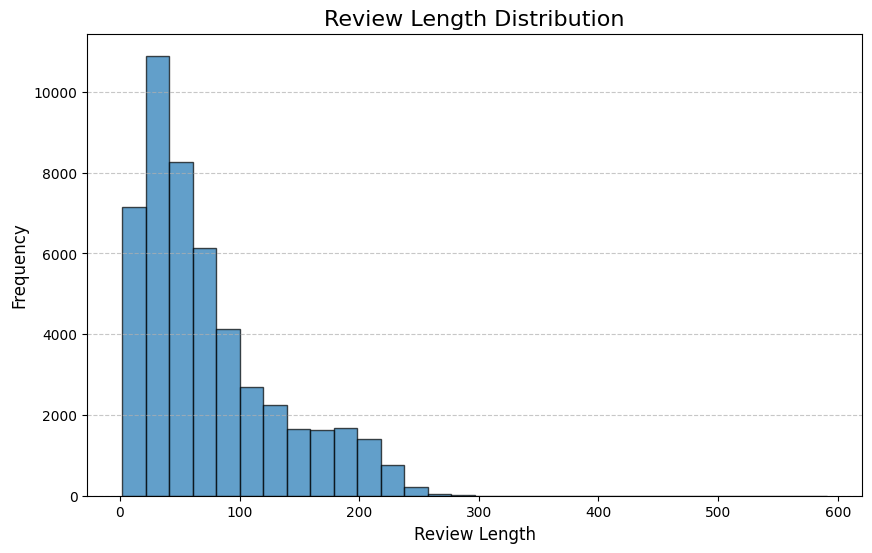

In [15]:
import matplotlib.pyplot as plt

# 히스토그램: 리뷰 길이 분포
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Review Length Distribution', fontsize=16)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

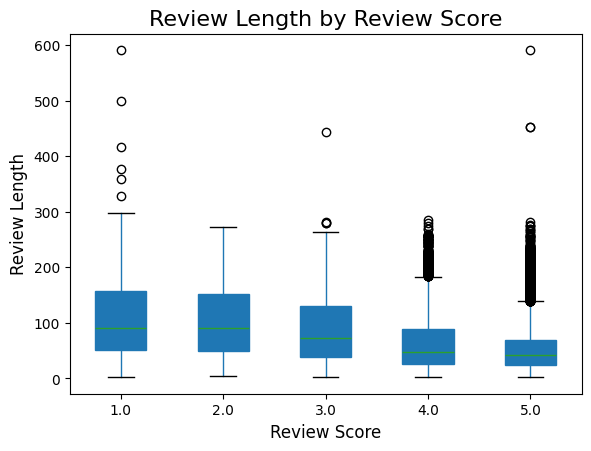

In [16]:
# 박스플롯: 별점에 따른 리뷰 길이 분포
plt.figure(figsize=(10, 6))
df.boxplot(column='review_length', by='review_score', grid=False, patch_artist=True)
plt.title('Review Length by Review Score', fontsize=16)
plt.suptitle('')  # Remove default title from boxplot
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Review Length', fontsize=12)
plt.show()


In [21]:
raw_df['review_comment_message'].isnull().sum()

66705

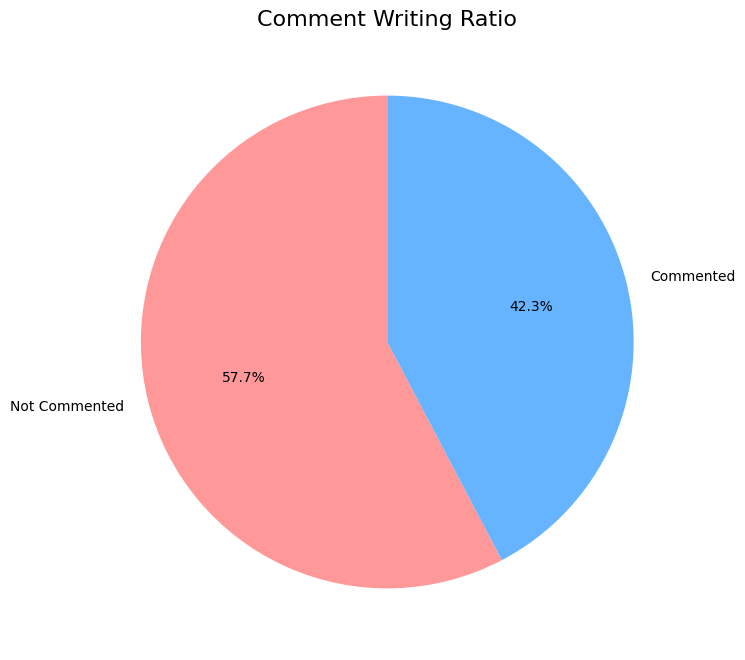

In [23]:
# 코멘트 작성 여부 파이 차트
comment_counts = raw_df['review_comment_message'].notnull().value_counts()
labels = ['Not Commented', 'Commented']

plt.figure(figsize=(8, 8))
plt.pie(comment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Comment Writing Ratio', fontsize=16)
plt.show()


C:\Users\LG\AppData\Local\Temp\ipykernel_12392\3675872851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_rate'] = 1 - (df['price'] / (df['price'] + df['freight_value']))
C:\Users\LG\AppData\Local\Temp\ipykernel_12392\3675872851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_count'] = df.groupby('customer_unique_id')['order_id'].transform('nunique')
C:\Users\LG\AppData\Local\Temp\ipykernel_12392\3675872851.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

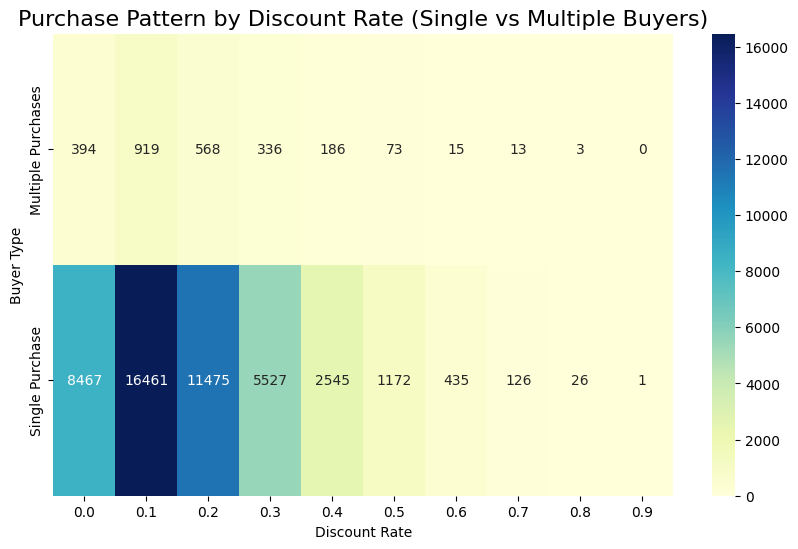

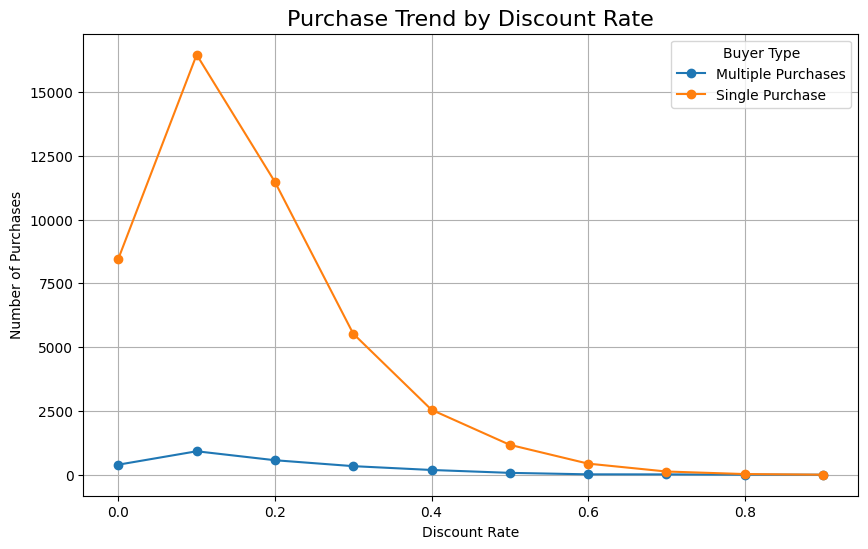

In [24]:
import seaborn as sns
import numpy as np

# 할인율 컬럼 추가 (가정)
# 할인율 = (할인가 - 정가) / 정가
df['discount_rate'] = 1 - (df['price'] / (df['price'] + df['freight_value']))

# 단회 및 다회 구매 고객 분리
df['purchase_count'] = df.groupby('customer_unique_id')['order_id'].transform('nunique')
df['buyer_type'] = np.where(df['purchase_count'] == 1, 'Single Purchase', 'Multiple Purchases')

# 할인율과 구매 수 패턴
discount_bins = np.linspace(0, 1, 11)
df['discount_bin'] = pd.cut(df['discount_rate'], bins=discount_bins, labels=np.round(discount_bins[:-1], 2))

# 구매 패턴 집계
purchase_pattern = df.groupby(['buyer_type', 'discount_bin']).size().unstack(fill_value=0)

# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(purchase_pattern, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Purchase Pattern by Discount Rate (Single vs Multiple Buyers)', fontsize=16)
plt.xlabel('Discount Rate')
plt.ylabel('Buyer Type')
plt.show()

# 선 그래프: 할인율에 따른 구매 패턴
purchase_pattern.T.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Purchase Trend by Discount Rate', fontsize=16)
plt.xlabel('Discount Rate')
plt.ylabel('Number of Purchases')
plt.legend(title='Buyer Type')
plt.grid(True)
plt.show()
